In [226]:
# import all the necessary packages
import numpy as np
import json
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import SciPy's norm() function.
import scipy
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [227]:
# Contents of the zip file
z = zipfile.ZipFile('D:/sr/1520467485_dsc_human_temp.zip','r')
#z.namelist()

In [228]:
# opening the above file to know its contents
with open('D:/sr/1520467485_dsc_human_temp/EDA_human_temperature/sliderule_dsi_inferential_statistics_exercise_1.ipynb') as f:
    data = json.load(f)
    f.close()
#data


# What is the True Normal Human Body Temperature?


#### `Exercises:`
    
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.
Answer the following questions:
##### 1. Is the distribution of body temperatures normal?
   > Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: 
       https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
       Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways:
        https://en.wikipedia.org/wiki/Normality_test                                                                 
                                                                              
                                                                                 
##### 2. Is the sample size large? Are the observations independent?
   > Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.        
        
###### 3.Is the true population mean really 98.6 degrees F?
   > First, try a bootstrap hypothesis test.Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
        In this situation, is it appropriate to use the $t$ or $z$ statistic?
        Now try using the other test. How is the result be different? Why?        
        
##### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
   > Which one is the correct one to use?
        What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
        As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
        Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the     appropriate formula for one draw, and not N draws.
        
##### 5. Is there a significant difference between males and females in normal temperature?
   > What testing approach did you use and why?
   
   


    
#### `Information and data sources:`

> [http://www.amstat.org/publications/jse/jse_data_archive.htm](http://www.amstat.org/publications/jse/jse_data_archive.htm)

> [http://www.amstat.org/publications/jse/datasets/normtemp.txt](http://www.amstat.org/publications/jse/datasets/normtemp.txt)

> https://en.wikipedia.org/wiki/Central_limit_theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
    
> [https://en.wikipedia.org/wiki/Normality_test](https://en.wikipedia.org/wiki/Normality_test)

> [Markdown syntax](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)  
       
    

In [229]:
#Reading the CSV file into a pandas DataFrame
df = pd.read_csv("human_body_temperature.csv")

# first 3 rows of df
print(df.head(3))

#Analyzing the dimensionality of the DataFrame
print(df.shape)

   temperature gender  heart_rate
0         99.3      F          68
1         98.4      F          81
2         97.8      M          73
(130, 3)


### Solution:

The data we have was first conceptualized and reported by Carl Wunderlich in a famous 1868 book where the mean normal body temperature was held
to be 37 °C or 98.6 °F for more than 120 years. The dataset is already loaded as df. The 3 variables in the df are: Temperature in °F,
Heart_rate and Gender. There are 130 rows of data in the dataframe.

The focus of our analysis will be on the true normal body temperature. To start with let's plot the distribution of the body temperatures and heart rates of the dataframe(df) which happens to be the numeric columns of the dataframe. The default number bins of matplotlib histogram plot is 10 bins. The "square root rule" is a commonly-used rule of thumb for choosing number of bins as below: 

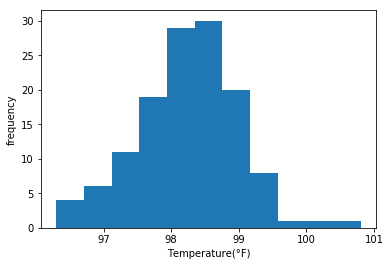

In [230]:
#Choose the number of bins to be the square root of the number of samples.Plot the histogram of  temperature.

# Compute number of data points: n_data
n_data = len(df['temperature'])

# Number of bins is the square root of number of data points: n_bins

n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(df['temperature'], bins = n_bins)

# Label axes
_ = plt.xlabel('Temperature(°F)')
_ = plt.ylabel('frequency')

# Show histogram
plt.show()

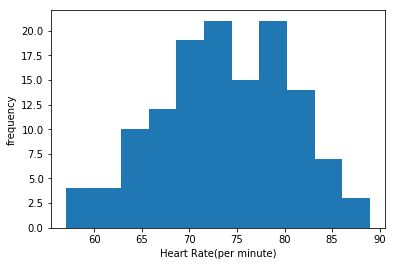

In [231]:

#Plot the histogram of  heart_rate.

# Compute number of data points: n_data
n_data = len(df['heart_rate'])

# Number of bins is the square root of number of data points: n_bins

n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(df['heart_rate'], bins = n_bins)

# Label axes
_ = plt.xlabel('Heart Rate(per minute)')
_ = plt.ylabel('frequency')

# Show histogram
plt.show()

There is nothing alarming in either histograms. As a sanity check, let's see if there are roughly the same number of females and males in each gender group.

In [232]:
# Counting the number of people in gender group

df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

In [233]:
#Descriptive or summary statistics in python – pandas, can be obtained by using describe function – describe()
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


It looks like there is roughly the same number of people in each gender group, Nice! Now, coming back to the questions, Is this distribution normal?
Let's find out!

## Question 1: Is the distribution of body temperatures normal?

#### Solution:
A normal distribution has some interesting properties: it has a bell shape, the mean and median are equal, and 68% of the data falls within 1 standard deviation.
The histograms plotted above roughly looks like it has a bell shape. The mean and median which is the 50th percentile calculated from df.describe() function are approximately  equal. When we perform a normal test from the scipy library, a large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis. Let's find out!

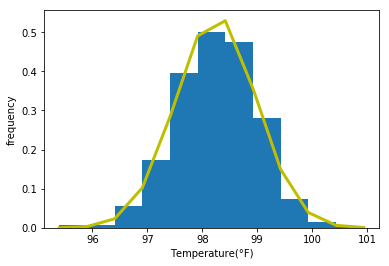

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [234]:
#The X axis represent the random variable and Y axis represent the probability of observing each value. You can see the tip of the bell curve is at 5 (mid way between 4 and 6) which is the mean.
mu, sigma = 98.249231, 0.733183
s = np.random.normal(mu, sigma, 1000)
# Compute number of data points: n_data
n_data = len(df['temperature'])

# Number of bins is the square root of number of data points: n_bins

n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)


# Create the bins and histogram
count, bins, ignored = plt.hist(s, n_bins, density=True)


# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')

# Label axes
plt.xlabel('Temperature(°F)')
plt.ylabel('frequency')
plt.show()

#perform a normal test from the scipy library
stats.normaltest(df.temperature)

As seen in the plot above, more than 68% of the data falls within 1 standard deviation from the mean of 98.24923. When we performed a normal test from the scipy library, p-value we got is about 0.25, which means this test does not reject the null hypothesis that this sample data is normally 
distributed. So we can assume that the body temperature data is normally distributed. In the visualization below, our set of values, normal_distr_values is plotted against a perfectly normal distribution. 

The sample mean is:  98.24923076923078
The sample standard deviation is:  0.7303577789050377
We expect to see roughly 68% of the observations below a body temperature value of: 98.97958854813581  and observed is:98.6 
We expect to see roughly 95% of the observations below a body temperature value of:  99.68073201588466 and observed is: 99.3


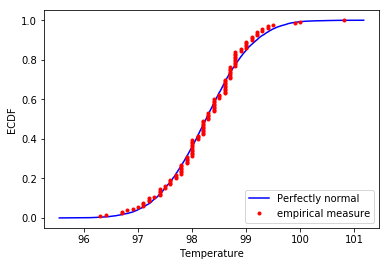

In [235]:
""" First let's define a function(ecdf) to calculate the "Empirical Cumulative Distribution function". An ECDF is an estimator of the Cumulative Distribution Function. The x- value of the ecdf is the quantity we are measuring. The y-value of ECDF is the fraction of datapoints smaller than the corresponding x-value.The x-values are the sorted data. Use the np.sort() function to perform the sorting
The y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end 
  value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n."""

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: yThe y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange().
    #Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1.
    # Be sure to divide this by n.
    y = np.arange(1,n+1) / n

    return x, y


#Get the sample mean and std
mean = np.mean(df.temperature)
std  = np.std(df.temperature)


print('The sample mean is: ', mean)
print('The sample standard deviation is: ', std)

obs_percentile = np.percentile(df['temperature'], [68,95])

print(f'We expect to see roughly 68% of the observations below a body temperature value of: {mean + std}  and observed is:{obs_percentile[0]} ' )
print(f'We expect to see roughly 95% of the observations below a body temperature value of:  {(mean + (1.96*std))} and observed is: {obs_percentile[1]}')



# Sample the normal dist given our sample mean/std
normal = np.random.normal(mean, std, 10000)

# Get the CDF of the sample and theoretical distributions
x, y = ecdf(df.temperature)
x_norm, y_norm = ecdf(normal)

# Plot it all'
plt.plot(x_norm, y_norm, color = 'blue',label = 'Perfectly normal')
plt.plot(x, y, marker='.', ls='none',color= 'red', label = 'empirical measure')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(loc = 'lower right')
plt.show()




The blue curve, which asymptotically approaches heights of 0 and 1  is the true cumulative distribution function of the standard normal distribution.The CDF is a theoretical construct - it is what you would see if you could take infinitely many samples. The red dots form the empirical distribution function of that sample.The sample ECDF seems to follow its expected true cumulative distribution function of the standard normal distribution.The empirical CDF approximates the theoretical CDF quite well. It is definitely safe to say that the body temperature is normally distributed.

## Question 2. Is the sample size large? Are the observations independent?

#### Solution:
The sample size of 130 observations is a tiny fraction of the population of all humans beings, but it is large enough for the Central Limit Theorem to apply, As a rule of thumb,to perform any parametric tests that assume a normal distribution, usually sample sizes >=30 is required. We already know using df.shape function that  there are 130 observations in this dataset which is larger than the usual threshold of 30.
Two observations are said to be independent if the occurrence of one observation provides no information about the occurrence of the other observation.  Based on the story of the Exponential distribution, the plot where the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right  helps us to to verify that the observed data are Exponentially distributed which  suggests that they are a random process; where a temperature of one person doesn't affect the temperature of the other person. Let's find out! 

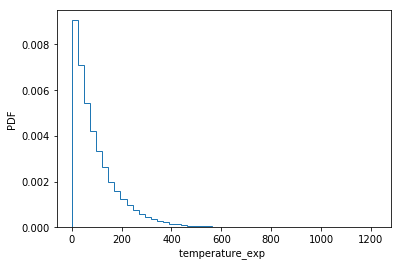

In [236]:
#Setting a variable
temperature = df['temperature']

# Compute mean temperature: tau
tau = np.mean(temperature)

# Draw out of an exponential distribution with parameter tau:
temperature_exp = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(temperature_exp,
             bins=50, density=True,histtype='step')
_ = plt.xlabel('temperature_exp ')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right. The plot above helps us to to verify that the observed data are Exponentially distributed which suggests that they are a random process; where the temperature of one person doesn't affect the temperature of the other person. The observations are also assumed to be independent since we are assuming the data gathered are all from different people when the experiment was conducted.


## Question 3. Is the true population mean really 98.6 degrees F?
    1. First, try a bootstrap hypothesis test.
    2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? 
    3. In this situation, is it appropriate to use the t or z statistic?
    4. Now try using the other test. How is the result be different? Why?

#### Solution:
The null hypothesis in this exercise states that the true population mean is really 98.6°F. ALternate hypothesis is that it's not 98.6°F. Since we are testing a sample set of data against the population mean (a single value), we should use a one-sample test.

 
$ t $ or $ Z $ statistic?
I would use t-test over z-test statistic since the population variance is not known or given and also, there is enough data and it is normally distributed.



 In a bootstrap hypothesis approach, we are going build the distribution of the test statistic through resampling as below:
                                                                               

In [237]:
"""Bootstrap approach: """

size = 100000
bs_replicates = np.empty(size)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'], len(temperature)))

    
    
# Compute fraction of replicates that are equal to the 98.6

p = np.sum(bs_replicates == 98.6) / size

ci_low, ci_high = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low, ci_high))
print('margin of error: +/-{:0.5}'.format((ci_high - np.mean(bs_replicates))))

print('p-value: {}'.format(p))

if p < 0.05:
    print("Since pval<0.05, reject Null Hypothesis")
else:
    print("Accept null hypothesis")

95% confidence interval: 98.123 - 98.375
margin of error: +/-0.12627
p-value: 0.0
Since pval<0.05, reject Null Hypothesis


The low p-value suggests that the null hypothesis that  the true population mean is really 98.6°F is false. 

In [238]:
#Frequentist Approach for sample of  temperatures:
# (5 % confidence interval for one draw

temperature = df['temperature']
sample_mean = np.mean(temperature)
print(f"The mean of temperatures for this sample is : {sample_mean}" )

sample_std = np.std(temperature)
print(f"The standard deviation of temperatures for the sample size of 10 is : {sample_std}" )

n = len(temperature)
print(f"The length  for the sample size is : {n}" )

se = sample_std/np.sqrt(n)
print(f"The standard error for this sample size of 10 is : {se}" )

'''The level of significance for this sample with 95% confidence is 0.025'''

"""The T-Value based on the significance level and the degrees of freedom in the standard deviation is +/-1.978524 using
online calculator: https://goodcalculators.com/student-t-value-calculator/"""

# Calculate the t value for alpha 0.025 and df 129

crit = stats.t.isf(0.025, n-1)
print(f"T score :{crit}")

conf_int_95 = [sample_mean - crit*se, sample_mean + crit*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))
 
print("μ0 = 98.6")

#Calculate the t test statistic

t_stat = (sample_mean - 98.6)/se
print('margin of error: +/-{:0.5}'.format((np.abs(t_stat)  * se)))

p_value = stats.t.sf(np.abs(t_stat), n-1)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat, p_value))

if p_value < 0.05:
    print("Since pval<0.05, reject Null Hypothesis")
else:
    print("Accept null hypothesis")


The mean of temperatures for this sample is : 98.24923076923078
The standard deviation of temperatures for the sample size of 10 is : 0.7303577789050377
The length  for the sample size is : 130
The standard error for this sample size of 10 is : 0.06405661469519336
T score :1.9785244914586055
95% confidence interval: (98.12, 98.38)
μ0 = 98.6
margin of error: +/-0.35077
The t-statistic is -5.476 and the p-value is 0.0000002
Since pval<0.05, reject Null Hypothesis


Frequentist inference is a type of statistical inference that draws conclusions from sample data by emphasizing the frequency or proportion of the data as  explained below:

Frequentist statistical testing:

To test the null hypothesis, we compute the t score using the following formula:

$ t \,score \,= \frac{\bar x - \,m}{\,s/(np.sqrt(n)} $

where t is the value we compute for the significance test,

$ x̄ $ = sample mean,

$ m $= is the hypothesized value of the population mean,

$ s $ = sample standard deviation,

$ n $ = sample size


The sample standard deviation $ s $ of the n = 130 temperature scores is np.std(df['temperature']= 0.733, the hypothesized value of $ m  $ is 98.6. The x̄ (sample mean) is computed as: np.sum(df['temperature'])/130 which comes to 98.25. Therefore, t can be computed as below:

$ t = (98.25-98.6)/(0.733/np.sqrt(130))  = -5.44 $

$\,degrees \,of \,freedom \,= \,(130 - 1) \,= \,129$

If we want to be 95 percent confident that our analysis is correct, the Alpha Level (Significance Level) would be 1 – .95 = 5 percent, for two-tailed tests, divide the alpha level by 2. For a 95% confidence interval & two tailed tests, alpha level would be 0.025.

If we want to be 99 percent confident that our analysis is correct, the Alpha Level (Significance Level) would be 1 – .99 = 0.01 percent, for two-tailed tests, divide the alpha level by 2. For a 99% confidence interval & two tailed tests, alpha level would be 0.005‬.

Standard error of the statistic =  (sample standard deviation) / (sample size)

If s = sample standard deviation and 𝑛 = sample size, then Standard error of the statistic(se) would be:
 
se(standard error) = s/√𝑛

When we look up the t- table, T-Value(t) for two-tailed with degrees of freedom(129) and 95% confidence is : +/- 1.978524.
    
𝑥̄   = sample mean.

The confidence interval can be calculated using the formula below:

Confidendence_interval_upper_limit = 𝑥¯+ t*se

Confidendence_interval_lower_limit 𝑥¯- t*se


T-Value (two-tailed) is : +/- 1.978524 for degrees of freedom of 129 and alpha level 0.025 when we look up the t-table.
                                                                                
 For the degrees of freedom of 129, and a look-up on a two-tailed t distribution for 95% confidence interval yields the interval between 98.12 and 98.38. The interval says that the plausible values for the true mean temperature on this sample are in that range. Or in other words, based on the computations, we can say that 95% of the time, the empirical mean of temperatures  𝑥̄   that we calculate is below that upper limit of 98.38°F, and above that lower limit of 98.12°F.


Margin of error can be calculated as below:

Margin of error = Critical value * Standard error of the statistic

Critical value here is the t-statistic that we computed in the above section

p-value = The probability of getting the sample data or more extreme, if the null hypothesis is really true.  

Our test statistic is t = -5.44 and assuming the conditions of inference have been met, a look-up on a two-tailed t distribution table finds the The p-value to be 0.0000002 which is less than 0.05. Therefore, we can reject the null hypothesis.

The p-value in z-test indicates that the null hypothesis should be rejected similar to t-test. It is extremely unlikely that the population mean temperature is as high as 98.6°F.

#### Question 4: Draw a small sample of size 10 from the data and repeat both tests.

    Which one is the correct one to use?    
    What do you notice? What does this tell you about the difference in application of the t and z statistic?
    As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you
    should use the appropriate formula for one draw, and not N draws.
    
##### Solution:
Again, since the population standard deviation is unknown, and also sample size(n) is 10, the t-test is the better option here.

In [239]:
np.random.seed(7)
# Draw a sample of 10
sample_temperature = np.random.choice(temperature, size=10)
t_stat = stats.ttest_1samp(sample_temperature, 98.6)
print('t-score: {}\np-value of t test: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))
if t_stat.pvalue < 0.05:
    print(f"Since pval is {round(t_stat.statistic,3)}<0.05 for t test statistic of {round(t_stat.statistic,3)}, we reject Null Hypothesis")
else:
    print(f"Since pval is {round(t_stat.statistic, 3)}>0.05 for Z test statistic of {round(t_stat.statistic,3)},  we accept Null Hypothesis")

ztest ,pval = rs_zscore, rs_z_pval = ztest(sample_temperature,value=98.6)
print(f'Z-score: {round(ztest,3)}\np-value of z-test: {round(pval,3)}')
if pval<0.05:
    print(f"Since pval is {pval}<0.05 for Z test statistic of {ztest},we reject Null Hypothesis")
else:
    print(f"Since pval is {round(pval, 3)}>0.05 for Z test statistic of {round(ztest,3)}, we accept Null Hypothesis")

t-score: -1.07747
p-value of t test: 0.3093
Since pval is -1.077>0.05 for Z test statistic of -1.077,  we accept Null Hypothesis
Z-score: -1.077
p-value of z-test: 0.281
Since pval is 0.281>0.05 for Z test statistic of -1.077, we accept Null Hypothesis


The p-value is greater than 0.05, so the null hypothesis cannot be rejected on the basis of this small sample t-test.



#### At what temperature should we consider someone's temperature to be "abnormal"?

In [240]:
# Construct a 95% confidence interval for the sample mean
temp_mean = np.mean(temperature)
se = np.std(temperature)/np.sqrt(len(temperature))
crit = stats.t.isf([0.025,0.005], n-1)
conf_int_95 = [temp_mean - crit[0]*se, temp_mean + crit[0]*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))

# Construct a 99% confidence interval for the sample mean
conf_int_99 = [temp_mean - crit[1]*se, temp_mean + crit[1]*se]
print("99% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_99[0],conf_int_99[1]))

95% confidence interval: (98.12, 98.38)
99% confidence interval: (98.08, 98.42)


#### Q6) Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    
###### Solution:
To do this analysis, we can use the two-sample test of the difference in means. The null hypothesis is that the average temperature for males and females are the same. At the 95% confidence level, our hypothesis test would be:

*(Null Hypothesis) Ho: Normal Male temperature = Normal Female Temperature

*(Alternative Hypothesis) Ha: Normal Male temperature ≠ Normal Female Temperature

Let's find out!
    


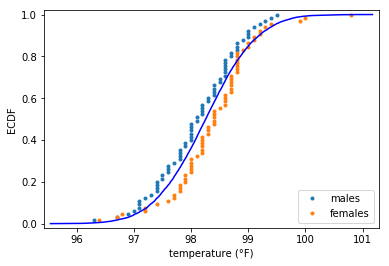

In [241]:
males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
# Compute ECDFs
x_m, y_m = ecdf(males)
x_f, y_f = ecdf(females)


# Plot the ECDFs
_ = plt.plot(x_m, y_m, marker='.', linestyle='none')
_ = plt.plot(x_f, y_f, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Get the CDF of the sample and theoretical distributions
x, y = ecdf(df.temperature)
x_norm, y_norm = ecdf(normal)

# Add axis labels and legend
_ =plt.plot(x_norm, y_norm, color = 'blue',label = 'Perfectly normal')
_ = plt.xlabel('temperature (°F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('males', 'females'), loc='lower right')

# Show the plot
plt.show()


The differences are much clearer in the ECDF. The mean temperature is larger in the females, and the variance does appear larger as well

In [242]:
"""Parameter(mean) estimates of human body temperature between males and females"""

'''Generating many bootstrap replicates
# Now we'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set.
Take 10,000 bootstrap replicates of the mean for the male body temperatues using draw_bs_reps() function. Also get 10,000 bootstrap replicates of the mean for
the female temperatures.Subtract one from another to get bootstrap replicates of the difference of means.
'''

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(males) - np.mean(females)

# Get bootstrap replicates of means
bs_replicates_m = draw_bs_reps(males, np.mean, 10000)
bs_replicates_f = draw_bs_reps(females, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_f - bs_replicates_m

#Use the replicates to compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)


difference of means = -0.289230769230727
95% confidence interval = [0.04       0.53538462]


The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.Compute mean of combined data set: combined_mean, as below:

In [243]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((males, females)))

# Shift the samples
tm_shifted = males - np.mean(males) + combined_mean
tf_shifted = females - np.mean(females) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_ms = draw_bs_reps(tm_shifted , np.mean, 10000)
bs_replicates_fs = draw_bs_reps(tf_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_fs - bs_replicates_ms

# Compute the p-value: p
p = np.sum(bs_diff_replicates == mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

if p < 0.05:
    print("Since p-vale < 0.05, we reject Null Hypothesis with 95 % confidence")
else:
    print("Accept null hypothesis")

p = 0.0
Since p-vale < 0.05, we reject Null Hypothesis with 95 % confidence


### Conclusion:
We get a p-value of 0.0001, which suggests that there is a statistically significant difference in the mean temperatures between males and females.
But it is very important to know how different they are! We got a difference of 0.29°F  between the means with the 95% confidence interval.
The difference seems to be substantial and there might be few situations where women’s core temperature are more clearly a little higher than men’s.

The normal human body temperature has been generally accepted as 98.6°F  for a long time, but the dataset here shows that the mean body temperature from a sample of 130 subjects to be about 98.2°F . Using the sample t-test to determine whether the true body temperature is 98.6°F  or not, and we got a p-value less than 0.001, rendering evidence to reject the hypothesis with 95% confidence. 